# 단순선형회귀

> 속도에 따른 제동거리 예측 데이터셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from helper.util import *
from helper.plot import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from ipywidgets import interact

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[scatterd] >WARNING> From c:\Users\hyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



### [2] 데이터셋 준비하기

In [2]:
origin = my_read_excel('https://data.hossam.kr/mldata/cars.xlsx', info=False)

## #02. 데이터 전처리

### [1] 훈련/검증 데이터 분리

In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='dist', test_size = 0.3)
rows, cols = x_train.shape
rows, cols

(35, 1)

## #03. 훈련 모델 적합

### [1] 신경망 정의

| 구분 | 모델 | 활성화 함수 | 옵티마이저 | 손실함수 | 평가지표 | 대표예제 |
|--|--|--|--|--|--|--|
| 회귀 | 단순선형회귀 | relu, linear | adam | mse | mae | |

In [4]:
# 디바이스 성능마다 손실률이 달라질수 있음
model = Sequential()

# 최종 검증 손실률: 374.854431, 최종 검증 절대오차: 15.983886
# model.add(Dense(2, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 376.018341, 최종 검증 절대오차: 15.594769
model.add(Dense(4, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 377.073425, 최종 검증 절대오차: 16.292393
# model.add(Dense(8, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 380.726410, 최종 검증 절대오차: 16.663055
# model.add(Dense(16, activation = 'relu', input_shape = (cols, )))

# 최종 검증 손실률: 386.750305, 최종 검증 절대오차: 17.112757
# model.add(Dense(32, activation = 'relu', input_shape = (cols, )))

# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함.
model.add(Dense(1, activation='linear'))

# 손실함수는 mse, 최적화 함수는 adam --> 문자열로 지정하는 것도 가능함
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
model.summary()

[scatterd] >WARNING> From c:\Users\hyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

[scatterd] >WARNING> From c:\Users\hyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\__init__.py:309: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### [2] 학습하기

In [5]:
%%time
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

result_df = DataFrame(result.history)
result_df["epochs"] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

[scatterd] >WARNING> From c:\Users\hyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.

[scatterd] >WARNING> From c:\Users\hyk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer_utils.py:384: The name tf.executing_eagerly_outside_functions is deprecated. Please use tf.compat.v1.executing_eagerly_outside_functions instead.



2/2 [==============================] - 0s 0s/step - loss: 297.4237 - mae: 11.7415
최종 훈련 손실률: 297.423676, 최종 훈련 절대오차: 11.741523
1/1 [==============================] - 0s 22ms/step - loss: 398.9426 - mae: 14.6843
최종 검증 손실률: 398.942566, 최종 검증 절대오차: 14.684322
CPU times: total: 15.2 s
Wall time: 14.4 s


,loss,mae,val_loss,val_mae
epochs,,,,
1,1927.571411,36.639023,1661.107666,34.226234
2,1923.455322,36.591080,1657.759644,34.180836
3,1919.439087,36.544765,1654.397705,34.135189
4,1915.614990,36.498943,1651.167969,34.091274
5,1911.741943,36.454639,1648.173828,34.050514
...,...,...,...,...
496,302.860870,11.829896,401.339355,14.676738
497,301.809845,11.810535,400.764069,14.678529
498,300.689789,11.793095,400.147308,14.680470


### [3] 훈련 결과 시각화

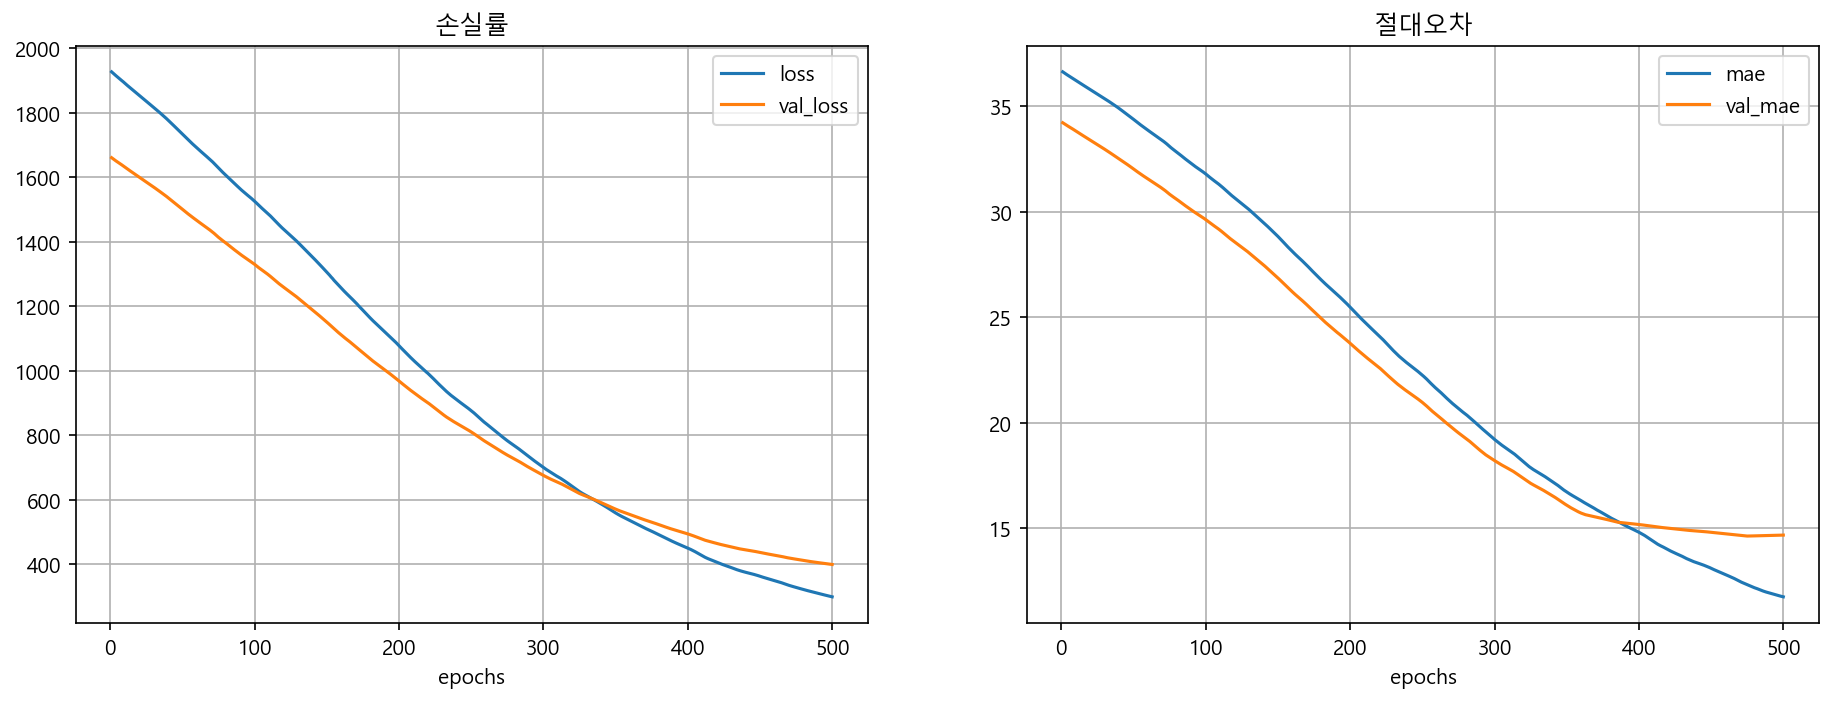

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=150)
result_df.plot(y=['loss', 'val_loss'], ax=ax[0])
result_df.plot(y=['mae', 'val_mae'], ax=ax[1])
ax[0].set_title('손실률')
ax[1].set_title('절대오차')
ax[0].grid()
ax[1].grid()
plt.show()
plt.close()

## #04. 예측 결과 활용

### [1] 예측치 구하기

In [7]:
pred =  model.predict(x_test, verbose=0)
pred

array([[41.33804 ],
       [29.801428],
       [27.494104],
       [48.260006],
       [18.264816],
       [39.030716],
       [48.260006],
       [43.645363],
       [34.416073],
       [20.572138],
       [43.645363],
       [45.952686],
       [39.030716],
       [43.645363],
       [32.10875 ]], dtype=float32)

### [2] 결과 데이터 셋 구성

In [8]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test,
    '예측값' : pred.flatten()
})

kdf['오차'] = kdf['실제값']-kdf['예측값']

my_pretty_table(kdf)

+----+--------------+----------+----------+----------+
|    |   검증데이터 |   실제값 |   예측값 |     오차 |
|----+--------------+----------+----------+----------|
| 28 |           17 |       32 |   41.338 | -9.33804 |
| 11 |           12 |       14 |  29.8014 | -15.8014 |
| 10 |           11 |       28 |  27.4941 | 0.505896 |
| 41 |           20 |       56 |    48.26 |  7.73999 |
|  2 |            7 |        4 |  18.2648 | -14.2648 |
| 27 |           16 |       40 |  39.0307 | 0.969284 |
| 38 |           20 |       32 |    48.26 |   -16.26 |
| 31 |           18 |       42 |  43.6454 | -1.64536 |
| 22 |           14 |       80 |  34.4161 |  45.5839 |
|  4 |            8 |       16 |  20.5721 | -4.57214 |
| 33 |           18 |       76 |  43.6454 |  32.3546 |
| 35 |           19 |       36 |  45.9527 | -9.95269 |
| 26 |           16 |       32 |  39.0307 | -7.03072 |
| 34 |           18 |       84 |  43.6454 |  40.3546 |
| 18 |           13 |       46 |  32.1087 |  13.8913 |
+----+--------------+--

### [3] 관측치와 예측치 비교 시각화

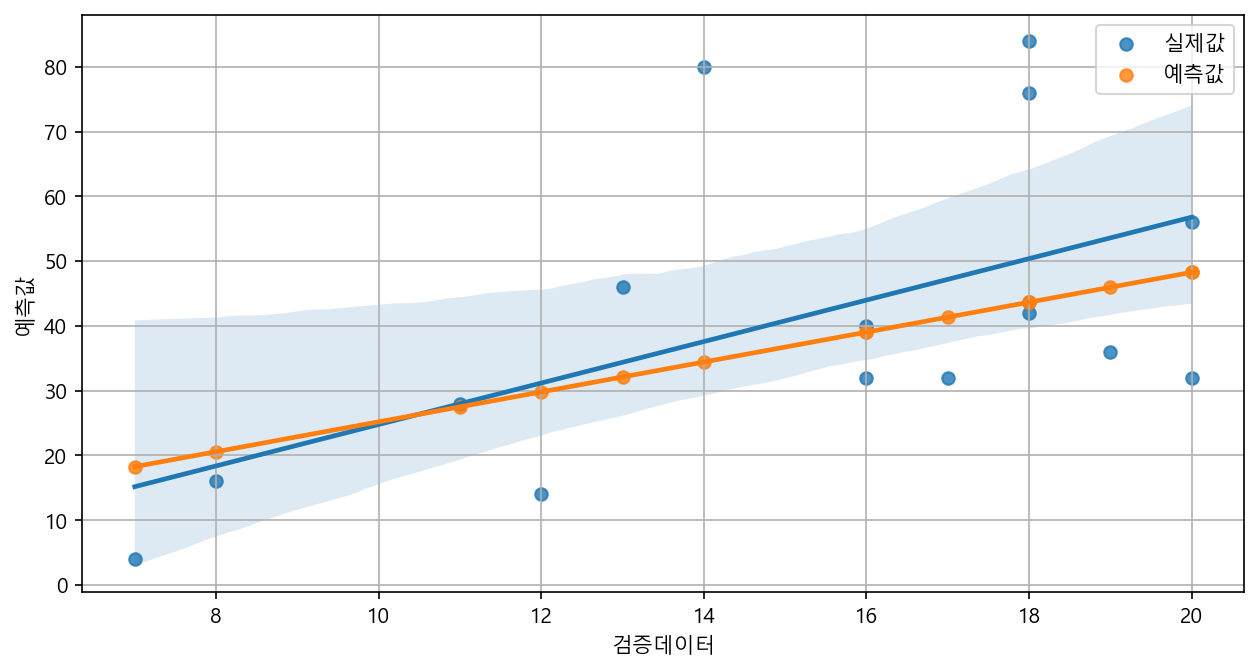

In [9]:
fig = plt.figure(figsize=(10, 5), dpi=150)
ax = fig.gca()

sb.regplot(data=kdf, x='검증데이터', y='실제값', label='실제값', ax=ax)
sb.regplot(data=kdf, x='검증데이터', y='예측값', label='예측값', ax=ax)
ax.legend()
ax.grid()
plt.show()
plt.close()

### [3] 임의의 값에 대한 머신러닝 예측 결과

#### (1) 단일 값을 통한 예측

In [10]:
my_speed = 50
my_speed_arr = np.array([[my_speed]])
my_dist = model.predict(my_speed_arr, verbose=0)
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, my_dist))

속도가 50인 자동차의 제동거리는 117로 예상됩니다.


### [4] 사용자 인터페이스 적용

In [11]:
@interact(x= (0, 100, 1))
def test(x):
    #print(x)
    input_x = np.array([[x]])
    output_y = model.predict(input_x, verbose=0)
    print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (x, output_y))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))